In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns

In [10]:
def plot_relational_plot(df):
    numeric_cols = df.select_dtypes(include=np.number).columns

    if len(numeric_cols) < 2:
        print("Not enough numeric columns for relational plot.")
        return

    x_col = numeric_cols[0]
    y_col = numeric_cols[1]

    fig, ax = plt.subplots(figsize=(8, 6))

    sns.regplot(data=df, x=x_col, y=y_col, ci=95, ax=ax)

    ax.set_title(f'{y_col} vs {x_col}')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

    plt.tight_layout()
    plt.show()

In [11]:
def plot_categorical_plot(df):
    categorical_cols = df.select_dtypes(include='object').columns
    numeric_cols = df.select_dtypes(include=np.number).columns

    if len(categorical_cols) == 0 or len(numeric_cols) == 0:
        print("Not enough columns for categorical plot.")
        return

    cat_col = categorical_cols[0]
    num_col = numeric_cols[0]

    fig, ax = plt.subplots(figsize=(8, 6))

    stats = df.groupby(cat_col)[num_col].mean()
    stats.plot(kind='bar', ax=ax)

    ax.set_title(f'Average {num_col} by {cat_col}')
    ax.set_xlabel(cat_col)
    ax.set_ylabel(f'Average {num_col}')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [12]:
def plot_statistical_plot(df):
    numeric_df = df.select_dtypes(include=np.number)

    if numeric_df.shape[1] < 2:
        print("Not enough numeric columns for pairplot.")
        return

    sns.pairplot(numeric_df, diag_kind='kde')
    plt.show()

In [13]:
def statistical_analysis(df, col: str):
    mean = np.mean(df[col])
    stddev = np.std(df[col], ddof=1)
    skew = ss.skew(df[col])
    excess_kurtosis = ss.kurtosis(df[col])

    return mean, stddev, skew, excess_kurtosis

In [14]:
def preprocessing(df):
    print("\nOriginal Columns:")
    print(df.columns)

    df.columns = df.columns.str.strip().str.replace(" ", "")

    print("\nCleaned Columns:")
    print(df.columns)

    df = df.drop_duplicates()
    df = df.dropna()

    print("\nDataset Summary:")
    print(df.describe())

    return df

In [15]:
def writing(moments, col):
    print(f'\nFor the attribute {col}:')
    print(f'Mean = {moments[0]:.2f}')
    print(f'Standard Deviation = {moments[1]:.2f}')
    print(f'Skewness = {moments[2]:.2f}')
    print(f'Excess Kurtosis = {moments[3]:.2f}')

    if moments[2] > 0:
        skew_text = "right skewed"
    elif moments[2] < 0:
        skew_text = "left skewed"
    else:
        skew_text = "approximately symmetric"

    if moments[3] > 0:
        kurt_text = "leptokurtic"
    elif moments[3] < 0:
        kurt_text = "platykurtic"
    else:
        kurt_text = "mesokurtic"

    print(f'The distribution is {skew_text} and {kurt_text}.')


Original Columns:
Index(['EmployeeID', 'Name', 'Department', 'Experience_Years',
       'Education_Level', 'Age', 'Gender', 'City', 'Monthly_Salary'],
      dtype='object')

Cleaned Columns:
Index(['EmployeeID', 'Name', 'Department', 'Experience_Years',
       'Education_Level', 'Age', 'Gender', 'City', 'Monthly_Salary'],
      dtype='object')

Dataset Summary:
       EmployeeID  Experience_Years        Age  Monthly_Salary
count    50.00000         50.000000  50.000000         50.0000
mean     25.50000          9.900000  39.760000      82288.8000
std      14.57738          5.349995  11.539745      33521.4379
min       1.00000          1.000000  22.000000      28420.0000
25%      13.25000          5.250000  28.250000      59424.0000
50%      25.50000         10.000000  43.500000      73890.5000
75%      37.75000         14.750000  49.000000     107219.0000
max      50.00000         19.000000  57.000000     149123.0000


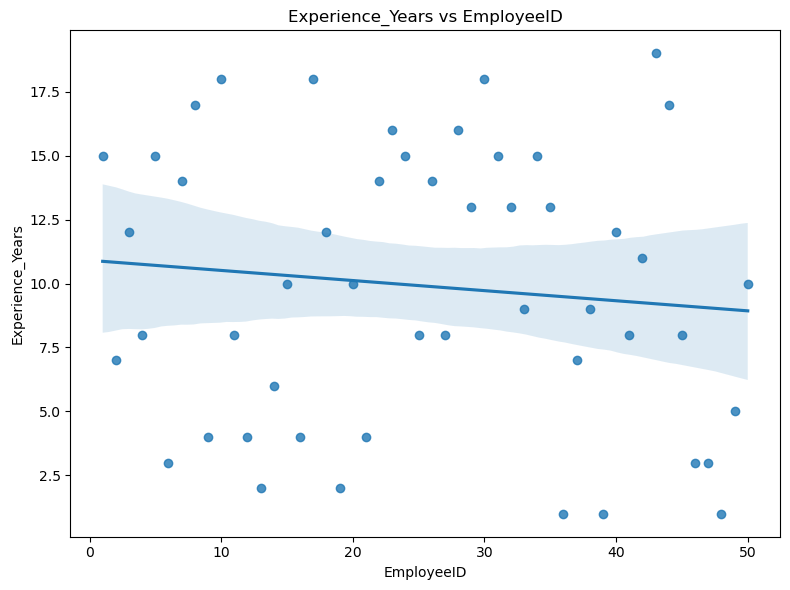

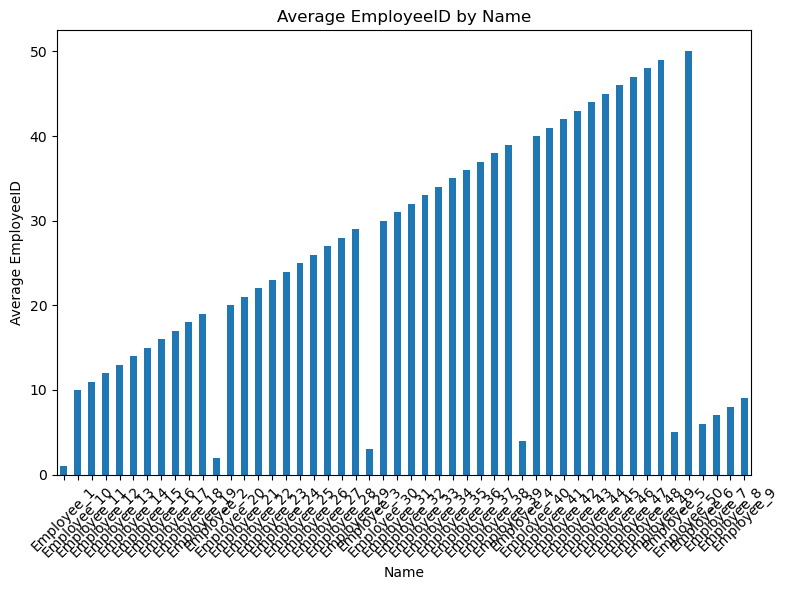

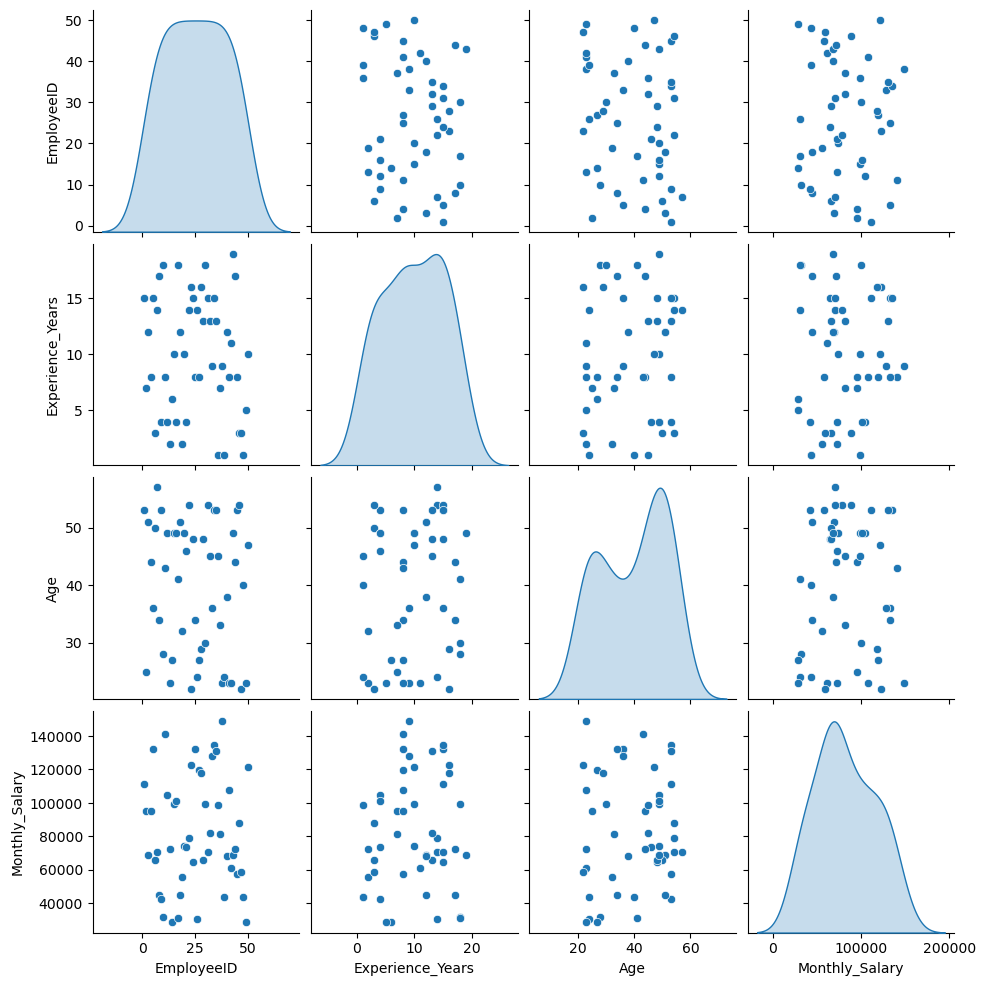


For the attribute EmployeeID:
Mean = 25.50
Standard Deviation = 14.58
Skewness = 0.00
Excess Kurtosis = -1.20
The distribution is approximately symmetric and platykurtic.


In [16]:
df = pd.read_csv('data.csv')

df = preprocessing(df)

numeric_cols = df.select_dtypes(include=np.number).columns

if len(numeric_cols) == 0:
    print("No numeric column found for analysis.")
else:
    col = numeric_cols[0]

    plot_relational_plot(df)
    plot_categorical_plot(df)
    plot_statistical_plot(df)

    moments = statistical_analysis(df, col)
    writing(moments, col)